In [1]:
import numpy as np
import matplotlib.pyplot as plt
from DBM import DBM
from expectations import model_expectations as me
from expectations import data_expectations as de

In [2]:
layers = [2,3,4]
dbm = DBM(layers)
me_methods = ["exact", "montecarlo", "smci"]
de_methods = ["exact", "mean_field", "smci"]
datas = np.random.choice([-1, 1], (100, layers[0]))

def plot(methods, exps):
    width = 0.3
    for n in range(len(layers)-1):
        axis = np.arange(layers[n] * layers[n+1])
        for i,m in enumerate(methods):
            plt.bar(axis+width*i, exps[m].weights[n].flatten(), width=width, label=m)
        plt.legend()
        plt.grid()
        plt.show()

calculating exact
calculating mean_field
calculating smci


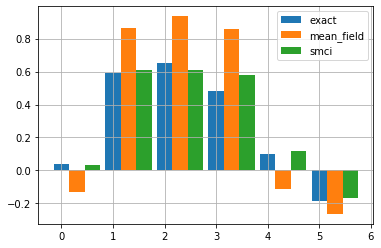

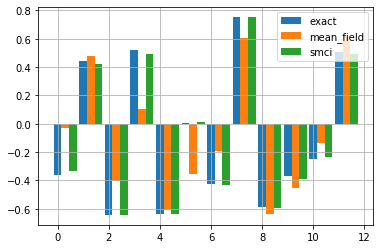

In [3]:
de_exps = {}
for m in de_methods:
    print("calculating {}".format(m))
    de.old_samples = None
    de.old_means = None
    dbm.data_expectations = getattr(de, m)
    de_exps[m] = dbm.data_expectations(dbm, datas)
plot(de_methods, de_exps)

calculating exact
calculating montecarlo
calculating smci


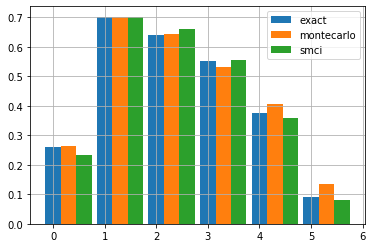

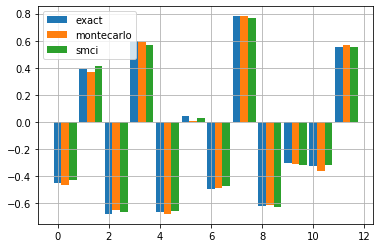

In [4]:
me_exps = {}
for m in me_methods:
    print("calculating {}".format(m))
    me.old_samples = None
    dbm.model_expectations = getattr(me, m)
    me_exps[m] = dbm.model_expectations(dbm)
plot(me_methods, me_exps)